In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def smooth_transform(score, pivot, new_pivot, smooth_factor=0.1):
    """
    Apply a smoother transformation around the pivot point.
    :param score: Original score.
    :param pivot: Original pivot value.
    :param new_pivot: New pivot value.
    :param smooth_factor: Determines the smoothness of the transition.
    :return: Smoothly adjusted score.
    """
    if score <= pivot - smooth_factor:
        return score * (new_pivot / pivot)
    elif pivot - smooth_factor < score < pivot + smooth_factor:
        return new_pivot + ((score - pivot) / (2 * smooth_factor)) * ((1 - new_pivot) / (1 - pivot))
    else:
        return new_pivot + (score - pivot) * ((1 - new_pivot) / (1 - pivot))

# Load your data
# data = pd.read_csv('path_to_your_data.csv')

# Assuming 'Transformed_Log_Combined_Score' is the column you want to transform
smooth_pivot = 0.6  # Original pivot
new_pivot = 0.85    # Adjusted pivot
smooth_factor = 0.1 # Smoothness factor

data['Smooth_Transformed_Score'] = data['Transformed_Log_Combined_Score'].apply(lambda x: smooth_transform(x, smooth_pivot, new_pivot, smooth_factor))

# Normalizing the smooth transformed scores
min_smooth = data['Smooth_Transformed_Score'].min()
max_smooth = data['Smooth_Transformed_Score'].max()
data['Normalized_Smooth_Transformed_Score'] = (data['Smooth_Transformed_Score'] - min_smooth) / (max_smooth - min_smooth)

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(data['Normalized_Smooth_Transformed_Score'], bins=20, color='teal', alpha=0.7)
plt.title('Histogram of Normalized Smooth Transformed Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


In [5]:
import pandas as pd
import numpy as np
data = pd.read_csv('data1.csv')

In [3]:
data

,Image,MS,Adj_MS,Emotion_Similarity,label
0,8940_ErnestBorgnine_88_m.jpg,0.57,0.59,0.50,1
1,14212_GeraldinePage_60_f.jpg,0.53,0.44,0.26,1
2,9169_PeterSellers_33_m.jpg,0.59,0.43,0.36,1
3,8902_ChristopherEccleston_46_m.jpg,0.50,0.40,0.58,0
4,1600_AlCorley_29_m.jpg,0.44,0.33,0.12,0
...,...,...,...,...,...
16482,15139_CatherineSchell_66_f.jpg,0.47,0.42,0.17,0
16483,13327_AvaGardner_34_f.jpg,0.52,0.40,0.52,1
16484,1685_BobDylan_71_m.jpg,0.46,0.43,0.50,0
16485,13932_BettyGrable_36_f.jpg,0.39,0.30,0.60,0


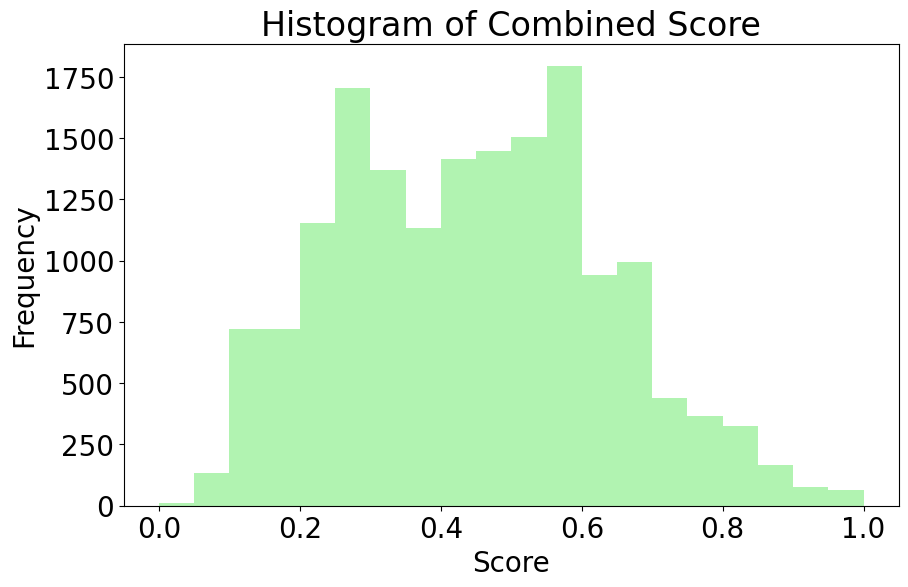

0.18849569674718952

In [7]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})  
# Applying logarithmic transformation to each score before combining
# Since log(0) is undefined, we'll use log(score + 1) to handle zero scores
data['Log_MS'] = np.log(data['MS'] + 1)
data['Log_Adj_MS'] = np.log(data['Adj_MS'] + 1)
data['Log_Emotion_Similarity'] = np.log(data['Emotion_Similarity'] + 1)

# Using the best weight combination found previously (Weighted_Score_10)
weights = {'MS': 0.1, 'Adj_MS': 0.2, 'Emotion_Similarity': 0.7}

# Combining the log-transformed scores
data['Log_Combined_Score'] = (data['Log_MS'] * weights['MS'] + 
                              data['Log_Adj_MS'] * weights['Adj_MS'] + 
                              data['Log_Emotion_Similarity'] * weights['Emotion_Similarity'])

# Linear Transformation to 0-1 range
min_log_combined = data['Log_Combined_Score'].min()
max_log_combined = data['Log_Combined_Score'].max()
data['Transformed_Log_Combined_Score'] = round((data['Log_Combined_Score'] - min_log_combined) / (max_log_combined - min_log_combined), 2)

# Calculating the standard deviation for the log combined score
std_dev_log_combined = np.std(data['Transformed_Log_Combined_Score'])

# Plotting histograms for the log combined score
plt.figure(figsize=(10, 6))
plt.hist(data['Transformed_Log_Combined_Score'], bins=20, color='lightgreen', alpha=0.7)
plt.title('Histogram of Combined Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.savefig('../plots/combined_score.pdf')
plt.show()

std_dev_log_combined


In [25]:
data['Log_Combined_Score'] = round(data['Log_Combined_Score'], 2) 
data

,Image,MS,Adj_MS,Emotion_Similarity,label,Log_MS,Log_Adj_MS,Log_Emotion_Similarity,Log_Combined_Score,Transformed_Log_Combined_Score
0,11815_AnjelicaHuston_34_f.jpg,0.61,0.52,0.03,1,0.476234,0.418710,0.029559,0.15,0.18
1,8552_CliffRobertson_37_m.jpg,0.50,0.46,0.54,0,0.405465,0.378436,0.431782,0.42,0.69
2,8732_RichardAttenborough_32_m.jpg,0.45,0.33,0.06,0,0.371564,0.285179,0.058269,0.13,0.15
3,13697_NormaShearer_37_f.jpg,0.59,0.41,0.00,1,0.463734,0.343590,0.000000,0.12,0.11
4,11218_PiaLindstrom_22_f.jpg,0.39,0.31,0.80,0,0.329304,0.270027,0.587787,0.50,0.84
...,...,...,...,...,...,...,...,...,...,...
3293,13447_DanielleDarrieux_86_f.jpg,0.48,0.47,0.41,0,0.392042,0.385262,0.343590,0.36,0.57
3294,3036_BillNighy_32_m.jpg,0.47,0.42,0.23,0,0.385262,0.350657,0.207014,0.25,0.38
3295,7008_ChristopherWalken_46_m.jpg,0.63,0.52,0.17,1,0.488580,0.418710,0.157004,0.24,0.36
3296,2350_AbeVigoda_83_m.jpg,0.65,0.62,0.29,1,0.500775,0.482426,0.254642,0.32,0.51


In [26]:
data.drop(columns=['Log_MS', 'Log_Adj_MS', 'Log_Emotion_Similarity', 'Log_Combined_Score'], inplace=True)

In [27]:
data.to_csv('test_data.csv', header=True, index=False)

In [28]:
data

,Image,MS,Adj_MS,Emotion_Similarity,label,Transformed_Log_Combined_Score
0,11815_AnjelicaHuston_34_f.jpg,0.61,0.52,0.03,1,0.18
1,8552_CliffRobertson_37_m.jpg,0.50,0.46,0.54,0,0.69
2,8732_RichardAttenborough_32_m.jpg,0.45,0.33,0.06,0,0.15
3,13697_NormaShearer_37_f.jpg,0.59,0.41,0.00,1,0.11
4,11218_PiaLindstrom_22_f.jpg,0.39,0.31,0.80,0,0.84
...,...,...,...,...,...,...
3293,13447_DanielleDarrieux_86_f.jpg,0.48,0.47,0.41,0,0.57
3294,3036_BillNighy_32_m.jpg,0.47,0.42,0.23,0,0.38
3295,7008_ChristopherWalken_46_m.jpg,0.63,0.52,0.17,1,0.36
3296,2350_AbeVigoda_83_m.jpg,0.65,0.62,0.29,1,0.51


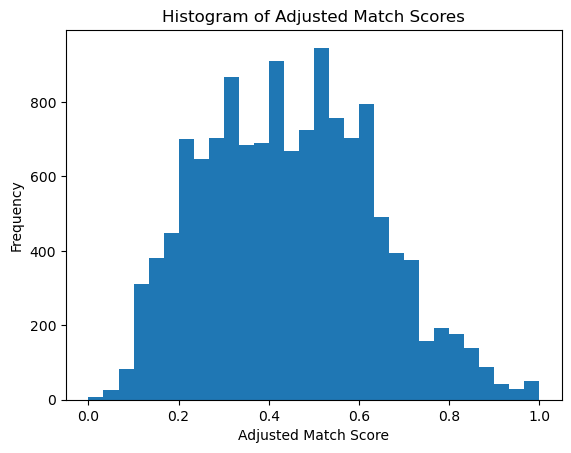

In [22]:
import matplotlib.pyplot as plt

# df = pd.read_csv('./quality_scores.csv')
# Histogram for adjusted match scores
data['Transformed_Log_Combined_Score'].plot(kind='hist', bins=30, title='Histogram of Adjusted Match Scores')
plt.xlabel('Adjusted Match Score')
plt.ylabel('Frequency')
plt.show()

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm

# Load the dataset
df = pd.read_csv('./AEM_scores.csv')

# Identify all unique emotions
all_emotions = set(df['Image1 Emotion'].unique()) | set(df['Image2 Emotion'].unique())

# Create a complete mapping for all emotion combinations
emotion_combinations = {}
for emotion1 in all_emotions:
    for emotion2 in all_emotions:
        # Assign a score for each combination
        # Replace 'your_score' with the actual score you want to assign
        emotion_combinations[(emotion1, emotion2)] = 1.25

# Function to calculate custom emotion impact score
def calculate_emotion_impact(row):
    emotion1 = row['Image1 Emotion']
    emotion2 = row['Image2 Emotion']
    return emotion_combinations.get((emotion1, emotion2), 1)  # Default score

# Apply the emotion impact scoring function
df['Emotion_Impact_Score'] = df.apply(calculate_emotion_impact, axis=1)

# Calculate average emotion impact score for each unique image
unique_images = set(df['Image1'].unique()) | set(df['Image2'].unique())
avg_scores = []

for image in tqdm(unique_images):
    filtered_df = df[(df['Image1'] == image) | (df['Image2'] == image)]
    avg_score = np.mean(filtered_df['Emotion_Impact_Score'])
    avg_scores.append({'Image': image, 'Average_Emotion_Impact_Score': avg_score})

avg_scores_df = pd.DataFrame(avg_scores)

# Output the first few rows of the average scores dataframe
print(avg_scores_df.head())


100%|██████████| 16487/16487 [41:20<00:00,  6.65it/s]    

                           Image  Average_Emotion_Impact_Score
0      3905_TomasMilian_57_m.jpg                          1.25
1        3062_BillNighy_62_m.jpg                          1.25
2        5603_PeterFalk_48_m.jpg                          1.25
3       7393_LyleTalbot_66_m.jpg                          1.25
4  9478_MaximilianShell_45_m.jpg                          1.25
